In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
text_data = pd.read_csv('speeches_millercenter_preprocessed.csv')

In [128]:
text_data.head(3)

,Transcript,Summary,President,Source,Date,URL,Word Count,Affiliation,Label
0,34th time speak oval office year soon time wan...,"In this broadcast from the Oval Office, Presid...",Ronald Reagan,National Archives,"January 11, 1989",https://millercenter.org/the-presidency/presid...,3289,Republican,0
1,thank warm welcome governor baliles congress...,NaN,Ronald Reagan,NaN,"December 16, 1988",https://millercenter.org/the-presidency/presid...,7127,Republican,0
2,thank thank seat live today remember know free...,"At a Veteran's Day Ceremony, Reagan praises th...",Ronald Reagan,Ronald Reagan Presidential Library,"November 11, 1988",https://millercenter.org/the-presidency/presid...,280,Republican,0


In [129]:
#  year world againand way ourselvesrediscover document 0

In [130]:
# train test split
from sklearn.model_selection import train_test_split
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(text_data['Transcript'],
                                         np.array(text_data['Label']),
                                         np.array(text_data['Affiliation']),
                                         test_size=0.33, random_state=42)
train_corpus.shape, test_corpus.shape

((261,), (130,))

In [131]:
from collections import Counter
trd = dict(Counter(train_label_names))
tsd = dict(Counter(test_label_names))
(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd],
             columns=['Target Label', 'Train Count', 'Test Count'])
.sort_values(by=['Train Count', 'Test Count'],
             ascending=False))

,Target Label,Train Count,Test Count
0,Democrat,167,73
1,Republican,94,57


In [132]:
# Bag of Words Vectorizer

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
# build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)
# transform test articles into features
cv_test_features = cv.transform(test_corpus)
print('BOW model:> Train features shape:', cv_train_features.shape,
      ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (261, 15611)  Test features shape: (130, 15611)


In [134]:
# Q: Basic, but can you define fit and transform?

In [135]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
len(vocab)

15611

In [136]:
# Note: shape of test and train array is: (number of documents, length of vocabulary)

In [137]:
# Testing ML classification models with BOW vectorization

In [138]:
# Naïve Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1)
mnb.fit(cv_train_features, train_label_names)
mnb_bow_cv_scores = cross_val_score(mnb, cv_train_features, train_label_names, cv=5)
mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)
print('CV Accuracy (5-fold):', mnb_bow_cv_scores)
print('Mean CV Accuracy:', mnb_bow_cv_mean_score)
mnb_bow_test_score = mnb.score(cv_test_features, test_label_names)
print('Test Accuracy:', mnb_bow_test_score)

CV Accuracy (5-fold): [0.83018868 0.92307692 0.86538462 0.82692308 0.80769231]
Mean CV Accuracy: 0.8506531204644412
Test Accuracy: 0.8538461538461538


In [139]:
# Questions
# What's the alpha parameter?
# What are the parameters of cross_val_score (cv=5?)
# Mean CV Accuracy == training score? Why do you call it *CV* accuracy?


In [140]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(cv_train_features, train_label_names)
lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_names, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)
lr_bow_test_score = lr.score(cv_test_features, test_label_names)
print('Test Accuracy:', lr_bow_test_score)

/opt/anaconda3/envs/nlp_capstone/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/nlp_capstone/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

CV Accuracy (5-fold): [0.83018868 0.84615385 0.88461538 0.94230769 0.86538462]
Mean CV Accuracy: 0.8737300435413644
Test Accuracy: 0.8307692307692308


/opt/anaconda3/envs/nlp_capstone/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [141]:
# Questions
# LR parameters: penalty, max_iter, C
# Errors

In [142]:
# Support Vector Machines
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(cv_train_features, train_label_names)
svm_bow_cv_scores = cross_val_score(svm, cv_train_features, train_label_names, cv=5)
svm_bow_cv_mean_score = np.mean(svm_bow_cv_scores)
print('CV Accuracy (5-fold):', svm_bow_cv_scores)
print('Mean CV Accuracy:', svm_bow_cv_mean_score)
svm_bow_test_score = svm.score(cv_test_features, test_label_names)
print('Test Accuracy:', svm_bow_test_score)

CV Accuracy (5-fold): [0.81132075 0.84615385 0.90384615 0.92307692 0.82692308]
Mean CV Accuracy: 0.8622641509433961
Test Accuracy: 0.7615384615384615


In [143]:
# SVM with Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
svm_sgd = SGDClassifier(loss='hinge', penalty="l2", max_iter=5, random_state=42)
svm_sgd.fit(cv_train_features, train_label_names)
svmsgd_bow_cv_scores = cross_val_score(svm_sgd, cv_train_features, train_label_names, cv=5)
svmsgd_bow_cv_mean_score = np.mean(svmsgd_bow_cv_scores)
print('CV Accuracy (5-fold):', svmsgd_bow_cv_scores)
print('Mean CV Accuracy:', svmsgd_bow_cv_mean_score)
svmsgd_bow_test_score = svm_sgd.score(cv_test_features, test_label_names)
print('Test Accuracy:', svmsgd_bow_test_score)

CV Accuracy (5-fold): [0.86792453 0.84615385 0.86538462 0.86538462 0.78846154]
Mean CV Accuracy: 0.8466618287373004
Test Accuracy: 0.823076923076923


/opt/anaconda3/envs/nlp_capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/nlp_capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [144]:
# Testing accuracy better than training?

In [145]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(cv_train_features, train_label_names)
rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_names, cv=5)
rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_names)
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.73584906 0.67307692 0.69230769 0.63461538 0.69230769]
Mean CV Accuracy: 0.6856313497822931
Test Accuracy: 0.676923076923077


In [146]:
# Really bad performance of Random Forest - why?

In [147]:
# Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(cv_train_features, train_label_names)
gbc_bow_cv_scores = cross_val_score(gbc, cv_train_features, train_label_names, cv=5)
gbc_bow_cv_mean_score = np.mean(gbc_bow_cv_scores)
print('CV Accuracy (5-fold):', gbc_bow_cv_scores)
print('Mean CV Accuracy:', gbc_bow_cv_mean_score)
gbc_bow_test_score = gbc.score(cv_test_features, test_label_names)
print('Test Accuracy:', gbc_bow_test_score)

CV Accuracy (5-fold): [0.79245283 0.73076923 0.67307692 0.69230769 0.61538462]
Mean CV Accuracy: 0.7007982583454282
Test Accuracy: 0.7076923076923077


In [148]:
# Also not as good as Naive Bayes or LR

In [173]:
# Multi-layer perceptron model
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [ ]:
# What are these parameters?

In [175]:
mlp.fit(cv_train_features, train_label_names)
mlp_cv_scores = cross_val_score(mlp, cv_train_features, train_label_names, cv=5)
mlp_cv_mean_score = np.mean(mlp_cv_scores)
print('CV Accuracy (5-fold):', mlp_cv_scores)
print('Mean CV Accuracy:', np.mean(mlp_cv_scores))
mlp_cv_test_score = mlp.score(cv_test_features, test_label_names)
print('Test Accuracy:', mlp_cv_test_score)

CV Accuracy (5-fold): [0.86792453 0.94230769 0.94230769 0.90384615 0.86538462]
Mean CV Accuracy: 0.904354136429608
Test Accuracy: 0.8461538461538461


In [149]:
## TD-IDF Vectorization ##

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
# build TDIDF features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(train_corpus)
# transform test articles into features
tv_test_features = tv.transform(test_corpus)
print('TFIDF model:> Train features shape:', tv_train_features.shape,
      ' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (261, 15611)  Test features shape: (130, 15611)


In [151]:
# What is the min_df max_df parameters? When should they be changed?

In [152]:
# Naïve Bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, train_label_names)
mnb_tfidf_cv_scores = cross_val_score(mnb, tv_train_features, train_label_names, cv=5)
mnb_tfidf_cv_mean_score = np.mean(mnb_tfidf_cv_scores)
print('CV Accuracy (5-fold):', mnb_tfidf_cv_scores)
print('Mean CV Accuracy:', mnb_tfidf_cv_mean_score)
mnb_tfidf_test_score = mnb.score(tv_test_features, test_label_names)
print('Test Accuracy:', mnb_tfidf_test_score)

CV Accuracy (5-fold): [0.64150943 0.65384615 0.63461538 0.63461538 0.63461538]
Mean CV Accuracy: 0.6398403483309143
Test Accuracy: 0.5615384615384615


In [153]:
# It does so much worse! Why?

In [154]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(tv_train_features, train_label_names)
lr_tfidf_cv_scores = cross_val_score(lr, tv_train_features, train_label_names, cv=5)
lr_tfidf_cv_mean_score = np.mean(lr_tfidf_cv_scores)
print('CV Accuracy (5-fold):', lr_tfidf_cv_scores)
print('Mean CV Accuracy:', lr_tfidf_cv_mean_score)
lr_tfidf_test_score = lr.score(tv_test_features, test_label_names)
print('Test Accuracy:', lr_tfidf_test_score)

CV Accuracy (5-fold): [0.71698113 0.76923077 0.73076923 0.71153846 0.73076923]
Mean CV Accuracy: 0.7318577648766328
Test Accuracy: 0.7230769230769231


In [155]:
# Support Vector Machines
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(tv_train_features, train_label_names)
svm_tfidf_cv_scores = cross_val_score(svm, tv_train_features, train_label_names, cv=5)
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svm_tfidf_cv_scores)
print('Mean CV Accuracy:', svm_tfidf_cv_mean_score)
svm_tfidf_test_score = svm.score(tv_test_features, test_label_names)
print('Test Accuracy:', svm_tfidf_test_score)

CV Accuracy (5-fold): [0.86792453 0.92307692 0.88461538 0.88461538 0.86538462]
Mean CV Accuracy: 0.8851233671988389
Test Accuracy: 0.8923076923076924


In [156]:
# SVM does really well with TDIDF

In [157]:
# SVM with Stochastic Gradient Descent
svm_sgd = SGDClassifier(loss='hinge', penalty="l2", max_iter=5, random_state=42)
svm_sgd.fit(tv_train_features, train_label_names)
svmsgd_tfidf_cv_scores = cross_val_score(svm_sgd, tv_train_features, train_label_names, cv=5)
svmsgd_tfidf_cv_mean_score = np.mean(svmsgd_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svmsgd_tfidf_cv_scores)
print('Mean CV Accuracy:', svmsgd_tfidf_cv_mean_score)
svmsgd_tfidf_test_score = svm_sgd.score(tv_test_features, test_label_names)
print('Test Accuracy:', svmsgd_tfidf_test_score)

CV Accuracy (5-fold): [0.86792453 0.84615385 0.94230769 0.88461538 0.88461538]
Mean CV Accuracy: 0.8851233671988389
Test Accuracy: 0.8846153846153846


/opt/anaconda3/envs/nlp_capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/nlp_capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [158]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(tv_train_features, train_label_names)
rfc_tfidf_cv_scores = cross_val_score(rfc, tv_train_features, train_label_names, cv=5)
rfc_tfidf_cv_mean_score = np.mean(rfc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', rfc_tfidf_cv_scores)
print('Mean CV Accuracy:', rfc_tfidf_cv_mean_score)
rfc_tfidf_test_score = rfc.score(tv_test_features, test_label_names)
print('Test Accuracy:', rfc_tfidf_test_score)

CV Accuracy (5-fold): [0.67924528 0.69230769 0.73076923 0.71153846 0.71153846]
Mean CV Accuracy: 0.7050798258345429
Test Accuracy: 0.6230769230769231


In [ ]:
# Again, why Random Forest so low?

In [159]:
# Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(tv_train_features, train_label_names)
gbc_tfidf_cv_scores = cross_val_score(gbc, tv_train_features, train_label_names, cv=5)
gbc_tfidf_cv_mean_score = np.mean(gbc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', gbc_tfidf_cv_scores)
print('Mean CV Accuracy:', gbc_tfidf_cv_mean_score)
gbc_tfidf_test_score = gbc.score(tv_test_features, test_label_names)
print('Test Accuracy:', gbc_tfidf_test_score)

CV Accuracy (5-fold): [0.73584906 0.80769231 0.63461538 0.75       0.69230769]
Mean CV Accuracy: 0.7240928882438317
Test Accuracy: 0.7538461538461538


In [176]:
# Multi-layer perceptron model with TD-IDF - from https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(tv_train_features, train_label_names)
mlp_tv_scores = cross_val_score(mlp, tv_train_features, train_label_names, cv=5)
mlp_tv_mean_score = np.mean(mlp_tv_scores)
print('CV Accuracy (5-fold):', mlp_tv_scores)
print('Mean CV Accuracy:', np.mean(mlp_tv_scores))
mlp_tv_test_score = mlp.score(tv_test_features, test_label_names)
print('Test Accuracy:', mlp_tv_test_score)

CV Accuracy (5-fold): [0.88679245 0.88461538 0.94230769 0.88461538 0.88461538]
Mean CV Accuracy: 0.896589259796807
Test Accuracy: 0.8923076923076924


In [178]:
results = pd.DataFrame([[mnb_bow_cv_mean_score, mnb_bow_test_score,
               mnb_tfidf_cv_mean_score, mnb_tfidf_test_score],
              [lr_bow_cv_mean_score, lr_bow_test_score, lr_tfidf_cv_mean_score, lr_tfidf_test_score],
              [svm_bow_cv_mean_score, svm_bow_test_score,
               svm_tfidf_cv_mean_score, svm_tfidf_test_score],
              [svmsgd_bow_cv_mean_score, svmsgd_bow_test_score, svmsgd_tfidf_cv_mean_score, svmsgd_tfidf_test_score],
              [rfc_bow_cv_mean_score, rfc_bow_test_score,
               rfc_tfidf_cv_mean_score, rfc_tfidf_test_score],
              [gbc_bow_cv_mean_score, gbc_bow_test_score, gbc_tfidf_cv_mean_score, gbc_tfidf_test_score],
              [mlp_cv_mean_score, mlp_cv_test_score,
               mlp_tv_mean_score, mlp_tv_test_score]],
              columns=['CV Score (TF)', 'Test Score (TF)',
                   'CV Score (TF-IDF)', 'Test Score (TF-IDF)'], index=['Naive Bayes', 'Logistic Regression',
                                    'Linear SVM', 'SVM Gradient Boosting', 'Random Forest',
                                    'GradientBoostingClassifier', 'Multi-layer pecerptron']
             )
results

,CV Score (TF),Test Score (TF),CV Score (TF-IDF),Test Score (TF-IDF)
Naive Bayes,0.850653,0.853846,0.639840,0.561538
Logistic Regression,0.873730,0.830769,0.731858,0.723077
Linear SVM,0.862264,0.761538,0.904282,0.892308
SVM Gradient Boosting,0.846662,0.823077,0.885123,0.884615
Random Forest,0.685631,0.676923,0.705080,0.623077
GradientBoostingClassifier,0.700798,0.707692,0.724093,0.753846
Multi-layer pecerptron,0.904354,0.846154,0.896589,0.892308


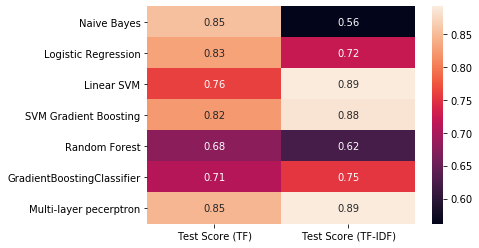

In [179]:
results_test = results[['Test Score (TF)', 'Test Score (TF-IDF)']]
_ = sns.heatmap(results_test, annot=True)

In [160]:
# Below are the old results (for comparison)

In [82]:
results = pd.DataFrame([[mnb_bow_cv_mean_score, mnb_bow_test_score,
               mnb_tfidf_cv_mean_score, mnb_tfidf_test_score],
              [lr_bow_cv_mean_score, lr_bow_test_score, lr_tfidf_cv_mean_score, lr_tfidf_test_score],
              [svm_bow_cv_mean_score, svm_bow_test_score,
               svm_tfidf_cv_mean_score, svm_tfidf_test_score],
              [svmsgd_bow_cv_mean_score, svmsgd_bow_test_score, svmsgd_tfidf_cv_mean_score, svmsgd_tfidf_test_score],
              [rfc_bow_cv_mean_score, rfc_bow_test_score,
               rfc_tfidf_cv_mean_score, rfc_tfidf_test_score],
              [gbc_bow_cv_mean_score, gbc_bow_test_score, gbc_tfidf_cv_mean_score, gbc_tfidf_test_score]],
              columns=['CV Score (TF)', 'Test Score (TF)',
                   'CV Score (TF-IDF)', 'Test Score (TF-IDF)'], index=['Naive Bayes', 'Logistic Regression',
                                    'Linear SVM', 'SVM Gradient Boosting', 'Random Forest',
                                                                      'Gradient Boosted Machines']
             )
results

,CV Score (TF),Test Score (TF),CV Score (TF-IDF),Test Score (TF-IDF)
Naive Bayes,0.850726,0.823077,0.635994,0.561538
Logistic Regression,0.835486,0.815385,0.716546,0.723077
Linear SVM,0.827866,0.815385,0.865965,0.853846
SVM Gradient Boosting,0.827721,0.846154,0.858273,0.853846
Random Forest,0.678229,0.646154,0.685776,0.661538
Gradient Boosted Machines,0.700943,0.730769,0.739260,0.753846


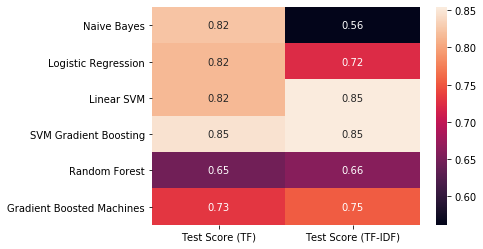

In [84]:
results_test = results[['Test Score (TF)', 'Test Score (TF-IDF)']]
_ = sns.heatmap(results_test, annot=True)

In [80]:
# Looks like SVM performed the best, with TF-IDF vectorization

In [87]:
## TUNING SECTION ##

In [165]:
# Tuning the Linear SVM model
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('svm', LinearSVC(random_state=42))
                       ])
param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'svm__C': [0.01, 0.1, 1, 5]
}
gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=2)
gs_svm = gs_svm.fit(train_corpus, train_label_names)
# evaluating best tuned model on the test dataset
best_svm_test_score = gs_svm.score(test_corpus, test_label_names)
print('Test Accuracy :', best_svm_test_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 2), total=   1.4s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 2), total=   1.4s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 2), total=   1.4s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   35.6s finished


Test Accuracy : 0.8923076923076924


In [167]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('tfidf',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=1.0, max_features=None,
                   min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                   smooth_idf=True, stop_words=None, strip_accents=None,
                   sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=None, use_idf=True, vocabulary=None)),
  ('svm',
   LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='squared_hinge', max_iter=1000,
             multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
             verbose=0))],
 'verbose': False,
 'tfidf': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding='utf-8',
                 input='cont

In [168]:
# Support Vector Machines - best parameters
svm_best = LinearSVC(penalty='l2', C=5, random_state=42)
svm_best.fit(tv_train_features, train_label_names)
svm_tfidf_cv_scores = cross_val_score(svm_best, tv_train_features, train_label_names, cv=5)
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svm_tfidf_cv_scores)
print('Mean CV Accuracy:', svm_tfidf_cv_mean_score)
svm_tfidf_test_score = svm.score(tv_test_features, test_label_names)
print('Test Accuracy:', svm_tfidf_test_score)

CV Accuracy (5-fold): [0.88679245 0.92307692 0.92307692 0.92307692 0.86538462]
Mean CV Accuracy: 0.9042815674891148
Test Accuracy: 0.8923076923076924


In [ ]:
# Tuning the MLP model
# svm_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
#                         ('svm', LinearSVC(random_state=42))
#                        ])
# param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
#               'svm__C': [0.01, 0.1, 1, 5]
# }
# gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=2)
# gs_svm = gs_svm.fit(train_corpus, train_label_names)
# # evaluating best tuned model on the test dataset
# best_svm_test_score = gs_svm.score(test_corpus, test_label_names)
# print('Test Accuracy :', best_svm_test_score)

In [ ]:
# gs_svm.best_estimator_.get_params()

In [ ]:
# MLP - best parameters
# svm_best = LinearSVC(penalty='l2', C=5, random_state=42)
# svm_best.fit(tv_train_features, train_label_names)
# svm_tfidf_cv_scores = cross_val_score(svm_best, tv_train_features, train_label_names, cv=5)
# svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
# print('CV Accuracy (5-fold):', svm_tfidf_cv_scores)
# print('Mean CV Accuracy:', svm_tfidf_cv_mean_score)
# svm_tfidf_test_score = svm.score(tv_test_features, test_label_names)
# print('Test Accuracy:', svm_tfidf_test_score)

In [ ]:
## Best model with TD-IDF (1,1) and LinearSVM(penalty='l2', C=5, random_state=42)
##
##
##

In [ ]:
# Q: Need more explanation and help interpreting this

In [ ]:
## TESTING THE MODELS ##

In [114]:
import model_evaluation_utils as meu 

In [170]:
mnb_predictions = svm_best.predict(tv_test_features)
unique_classes = list(set(test_label_names))
meu.get_metrics(true_labels=test_label_names, predicted_labels=mnb_predictions)


Accuracy: 0.8923
Precision: 0.893
Recall: 0.8923
F1 Score: 0.8918


In [171]:
meu.display_classification_report(true_labels=test_label_names,
                                  predicted_labels=mnb_predictions,
                                  classes=unique_classes)


              precision    recall  f1-score   support

  Republican       0.91      0.84      0.87        57
    Democrat       0.88      0.93      0.91        73

    accuracy                           0.89       130
   macro avg       0.89      0.89      0.89       130
weighted avg       0.89      0.89      0.89       130



In [ ]:
# Q: Can we go over how to interpret this again?

In [ ]:
# Q: How to build confusion matrix, similar to this?

unique_class_nums = label_map_df['Label Number'].values
mnb_prediction_class_nums = [label_data_map[item] for item in mnb_predictions]
meu.display_confusion_matrix_pretty(true_labels=test_label_nums,
                                   predicted_labels=mnb_prediction_class_nums, classes=unique_class_nums)

In [ ]:
# Q: Is it possible to get a confidence % in predicted classification for SVM, or only for Naive Bayes? 
